Compressed Tensor Shape: torch.Size([51, 20])


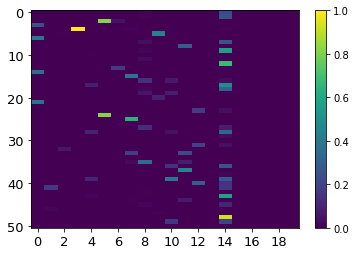

In [99]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os
# 创建一个形状为 (21, 512, 512) 的示例张量
# tensor = torch.randn(21, 512, 512)

path = "./demo/cisdq/voc_15_1_0/"
image_list = os.listdir(path)
tensor_list = []
for idx,name in enumerate(image_list):
    if idx>50:
        break
    
    name_p = os.path.join(path,name)
    # 从.npy文件加载数据
    data_np = np.load(name_p)

    # 将NumPy数组转换为PyTorch张量
    data_tensor = torch.from_numpy(data_np)[1:]
    
#     print(data_tensor.shape)
#     assert False
    # 进行全局平均池化，将 (512, 512) 降为 (1, 1)
    pooled_tensor = F.adaptive_avg_pool2d(data_tensor, (1, 1))

    # 将结果展平为一维
    flattened_tensor = pooled_tensor.view(-1)
    tensor_list.append(flattened_tensor)
#     print(flattened_tensor.shape)
    # 打印压缩后的张量形状
stacked_tensor = torch.stack(tensor_list)
print("Compressed Tensor Shape:", stacked_tensor.shape)

# 可视化
plt.imshow(stacked_tensor.numpy()/stacked_tensor.numpy().max(), cmap='viridis', aspect='auto')
# 设置横坐标的刻度为双数
plt.xticks(np.arange(0, 20, 2))

# 设置横坐标和纵坐标的字号
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.colorbar()
plt.savefig('step0_10.pdf')
plt.show()
# 保存图形为PDF文件


Compressed Tensor Shape: torch.Size([51, 20])


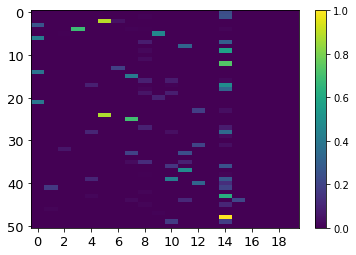

In [96]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os
# 创建一个形状为 (21, 512, 512) 的示例张量
# tensor = torch.randn(21, 512, 512)

path = "./demo/cisdq/voc_15_1_1/"
image_list = os.listdir(path)
tensor_list = []
for idx,name in enumerate(image_list):
    if idx>50:
        break
    
    name_p = os.path.join(path,name)
    # 从.npy文件加载数据
    data_np = np.load(name_p)

    # 将NumPy数组转换为PyTorch张量
    data_tensor = torch.from_numpy(data_np)[1:]
    
#     print(data_tensor.shape)
#     assert False
    # 进行全局平均池化，将 (512, 512) 降为 (1, 1)
    pooled_tensor = F.adaptive_avg_pool2d(data_tensor, (1, 1))

    # 将结果展平为一维
    flattened_tensor = pooled_tensor.view(-1)
    flattened_tensor[15:] = flattened_tensor[15:] - 0.2
    flattened_tensor[flattened_tensor<0] = 0
    for i in range(len(flattened_tensor)):
        if i>=15 and flattened_tensor[i]!=flattened_tensor.max():
            flattened_tensor[i]=0
    tensor_list.append(flattened_tensor)
    # 打印压缩后的张量形状
stacked_tensor = torch.stack(tensor_list)
print("Compressed Tensor Shape:", stacked_tensor.shape)

# 可视化
plt.imshow(stacked_tensor.numpy()/stacked_tensor.numpy().max(), cmap='viridis', aspect='auto')
# 设置横坐标的刻度为双数
plt.xticks(np.arange(0, 20, 2))

# 设置横坐标和纵坐标的字号
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.colorbar()
plt.savefig('step1_10.pdf')
plt.show()
# 保存图形为PDF文件


Compressed Tensor Shape: torch.Size([51, 20])


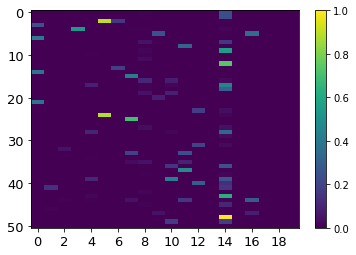

In [95]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os
import random
# 创建一个形状为 (21, 512, 512) 的示例张量
# tensor = torch.randn(21, 512, 512)
# 设置随机数种子，以确保结果可重复
torch.manual_seed(42)
# 设置稀疏化的比例，这里假设稀疏化比例为0.5
sparsity_ratio = 0.5
# 计算要稀疏化的元素个数
dense_matrix = torch.randn(5, 20)
num_elements_to_keep = int((1 - sparsity_ratio) * dense_matrix.numel())

path = "./demo/cisdq/voc_15_1_2/"
image_list = os.listdir(path)
tensor_list = []
for idx,name in enumerate(image_list):
    if idx>50:
        break
    
    name_p = os.path.join(path,name)
    # 从.npy文件加载数据
    data_np = np.load(name_p)

    # 将NumPy数组转换为PyTorch张量
    data_tensor = torch.from_numpy(data_np)[1:]
    
#     print(data_tensor.shape)
#     assert False
    # 进行全局平均池化，将 (512, 512) 降为 (1, 1)
    pooled_tensor = F.adaptive_avg_pool2d(data_tensor, (1, 1))

    # 将结果展平为一维
    flattened_tensor = pooled_tensor.view(-1)
    
    # 将结果展平为一维
    flattened_tensor = pooled_tensor.view(-1)
    flattened_tensor[15:] = flattened_tensor[15:] - 0.2
    flattened_tensor[flattened_tensor<0] = 0
    for i in range(len(flattened_tensor)):
        if i>=15 and flattened_tensor[i]!=flattened_tensor.max():
            flattened_tensor[i]=0
    tensor_list.append(flattened_tensor)
#     print(flattened_tensor.shape)
    # 打印压缩后的张量形状
stacked_tensor = torch.stack(tensor_list)
print("Compressed Tensor Shape:", stacked_tensor.shape)

haha = stacked_tensor.numpy()/stacked_tensor.numpy().max()


# 可视化
plt.imshow(haha, cmap='viridis', aspect='auto')
# 设置横坐标的刻度为双数
plt.xticks(np.arange(0, 20, 2))

# 设置横坐标和纵坐标的字号
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.colorbar()
plt.savefig('step2_10.pdf')
plt.show()
# 保存图形为PDF文件


## step3

Compressed Tensor Shape: torch.Size([51, 20])


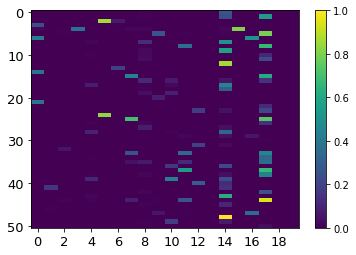

In [94]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os
# 创建一个形状为 (21, 512, 512) 的示例张量
# tensor = torch.randn(21, 512, 512)

path = "./demo/cisdq/voc_15_1_3/"
image_list = os.listdir(path)
tensor_list = []
for idx,name in enumerate(image_list):
    if idx>50:
        break
    
    name_p = os.path.join(path,name)
    # 从.npy文件加载数据
    data_np = np.load(name_p)

    # 将NumPy数组转换为PyTorch张量
    data_tensor = torch.from_numpy(data_np)[1:]
    
#     print(data_tensor.shape)
#     assert False
    # 进行全局平均池化，将 (512, 512) 降为 (1, 1)
    pooled_tensor = F.adaptive_avg_pool2d(data_tensor, (1, 1))

    # 将结果展平为一维
    flattened_tensor = pooled_tensor.view(-1)
    flattened_tensor[15:] = flattened_tensor[15:] 
    flattened_tensor[flattened_tensor<0] = 0
    for i in range(len(flattened_tensor)):
        if i>=15 and flattened_tensor[i]!=flattened_tensor.max():
            flattened_tensor[i]=0
    tensor_list.append(flattened_tensor)
#     print(flattened_tensor.shape)
    # 打印压缩后的张量形状
stacked_tensor = torch.stack(tensor_list)
print("Compressed Tensor Shape:", stacked_tensor.shape)

# 可视化
plt.imshow(stacked_tensor.numpy()/stacked_tensor.numpy().max(), cmap='viridis', aspect='auto')
# 设置横坐标的刻度为双数
plt.xticks(np.arange(0, 20, 2))

# 设置横坐标和纵坐标的字号
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.colorbar()
plt.savefig('step3_10.pdf')
plt.show()
# 保存图形为PDF文件


Compressed Tensor Shape: (51, 20)


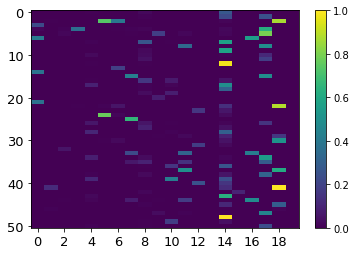

In [93]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os
# 创建一个形状为 (21, 512, 512) 的示例张量
# tensor = torch.randn(21, 512, 512)

path = "./demo/cisdq/voc_15_1_4/"
image_list = os.listdir(path)
tensor_list = []
for idx,name in enumerate(image_list):
    if idx>50:
        break
    
    name_p = os.path.join(path,name)
    # 从.npy文件加载数据
    data_np = np.load(name_p)

    # 将NumPy数组转换为PyTorch张量
    data_tensor = torch.from_numpy(data_np)[1:]
    
#     print(data_tensor.shape)
#     assert False
    # 进行全局平均池化，将 (512, 512) 降为 (1, 1)
    pooled_tensor = F.adaptive_avg_pool2d(data_tensor, (1, 1))

    # 将结果展平为一维
    # 将结果展平为一维
    flattened_tensor = pooled_tensor.view(-1)
    flattened_tensor[15:] = flattened_tensor[15:]
    flattened_tensor[flattened_tensor<0] = 0
    for i in range(len(flattened_tensor)):
        if i>=15 and flattened_tensor[i]!=flattened_tensor.max():
            flattened_tensor[i]=0
    tensor_list.append(flattened_tensor)
#     print(flattened_tensor.shape)
    # 打印压缩后的张量形状
stacked_tensor = torch.stack(tensor_list).numpy()
print("Compressed Tensor Shape:", stacked_tensor.shape)

stacked_tensor[:,:15] = stacked_tensor[:,:15]/stacked_tensor[:,:15].max()
stacked_tensor[:,15:] = stacked_tensor[:,15:]/stacked_tensor[:,15:].max()
# stacked_tensor[stacked_tensor[:,15:]!=1]==0
# 可视化
plt.imshow(stacked_tensor, cmap='viridis', aspect='auto')
# 设置横坐标的刻度为双数
plt.xticks(np.arange(0, 20, 2))

# 设置横坐标和纵坐标的字号
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.colorbar()
plt.savefig('step4_10.pdf')
plt.show()
# 保存图形为PDF文件


Compressed Tensor Shape: (51, 20)


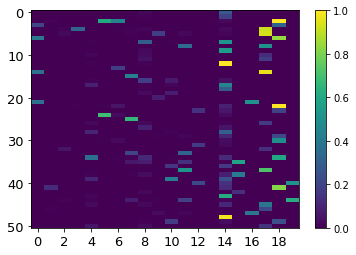

In [98]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os
# 创建一个形状为 (21, 512, 512) 的示例张量
# tensor = torch.randn(21, 512, 512)

path = "./demo/cisdq/voc_15_1_5/"
image_list = os.listdir(path)
tensor_list = []
for idx,name in enumerate(image_list):
    if idx>50:
        break
    
    name_p = os.path.join(path,name)
    # 从.npy文件加载数据
    data_np = np.load(name_p)

    # 将NumPy数组转换为PyTorch张量
    data_tensor = torch.from_numpy(data_np)[1:]
    
#     print(data_tensor.shape)
#     assert False
    # 进行全局平均池化，将 (512, 512) 降为 (1, 1)
    pooled_tensor = F.adaptive_avg_pool2d(data_tensor, (1, 1))

    # 将结果展平为一维
    # 将结果展平为一维
    flattened_tensor = pooled_tensor.view(-1)
    flattened_tensor[15:] = flattened_tensor[15:]
    flattened_tensor[flattened_tensor<0] = 0
    for i in range(len(flattened_tensor)):
        if i>=15 and flattened_tensor[i]!=flattened_tensor.max():
            flattened_tensor[i]=0
    tensor_list.append(flattened_tensor)
#     print(flattened_tensor.shape)
    # 打印压缩后的张量形状
stacked_tensor = torch.stack(tensor_list).numpy()
print("Compressed Tensor Shape:", stacked_tensor.shape)

stacked_tensor[:,:15] = stacked_tensor[:,:15]/stacked_tensor[:,:15].max()
stacked_tensor[:,15:] = stacked_tensor[:,15:]/stacked_tensor[:,15:].max()
# stacked_tensor[stacked_tensor[:,15:]!=1]==0
# 可视化
plt.imshow(stacked_tensor, cmap='viridis', aspect='auto')
# 设置横坐标的刻度为双数
plt.xticks(np.arange(0, 20, 2))

# 设置横坐标和纵坐标的字号
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.colorbar()
plt.savefig('step5_10.pdf')
plt.show()
# 保存图形为PDF文件
